# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/titanic.csv')

# Data Overview

## Shape

In [2]:
df.shape

(891, 12)

## head()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## describe()

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## isnull()

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Quality Assessment

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

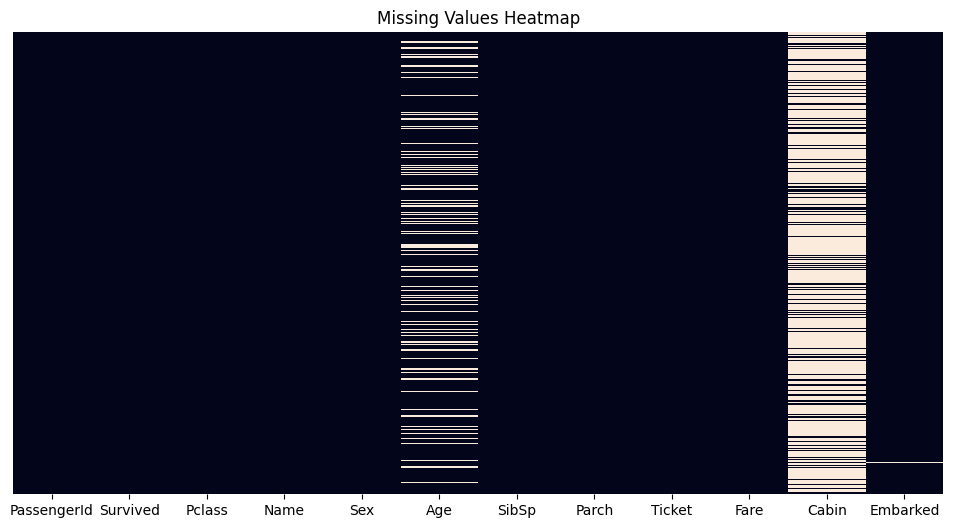

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Univariate Analysis

## Survived

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df['Survived'].value_counts() / len(df) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

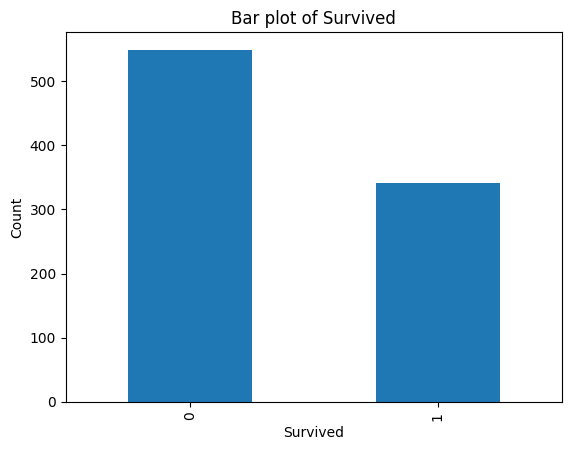

In [12]:
df['Survived'].value_counts().plot(kind='bar')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived')
plt.show()


In [13]:
df['Survived'].mean()

np.float64(0.3838383838383838)

## Pclass

In [14]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
df['Pclass'].value_counts() / len(df) * 100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

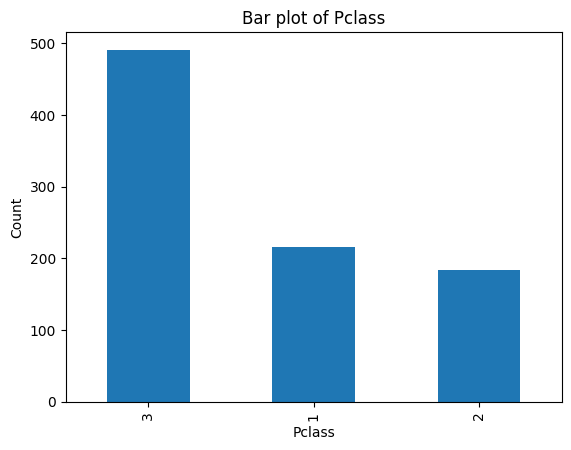

In [16]:
df['Pclass'].value_counts().plot(kind='bar')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Bar plot of Pclass')
plt.show()

## Sex

In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
df['Sex'].value_counts() / len(df) * 100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

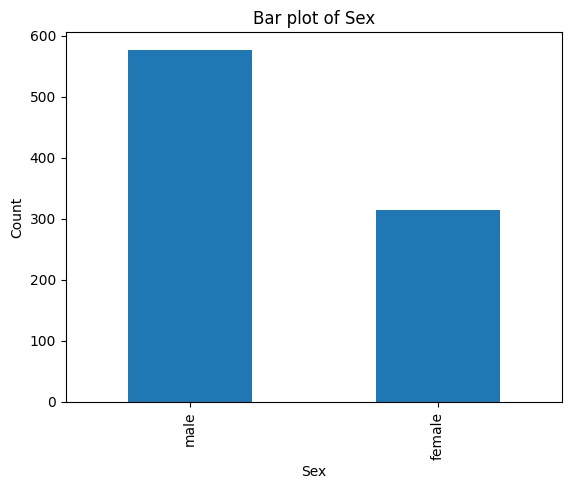

In [19]:
df['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar plot of Sex')
plt.show()

## Age

In [20]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
df['Age'].median()

np.float64(28.0)

In [22]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [23]:
df['Age'].isnull().sum()

np.int64(177)

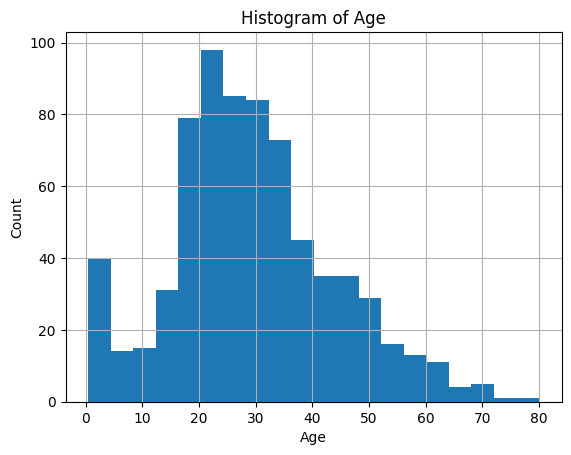

In [24]:
df['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

<Axes: xlabel='Age'>

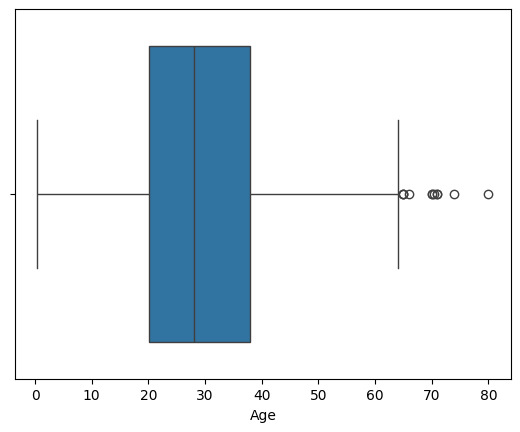

In [25]:
sns.boxplot(x=df['Age'])

In [26]:
df['Age'].skew(), df['Age'].kurt()

(np.float64(0.38910778230082704), np.float64(0.17827415364210353))

## SibSp

In [27]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [28]:
df['SibSp'].mode()

0    0
Name: SibSp, dtype: int64

In [29]:
df['SibSp'].median()

np.float64(0.0)

In [30]:
df['SibSp'].value_counts() / len(df) * 100

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64

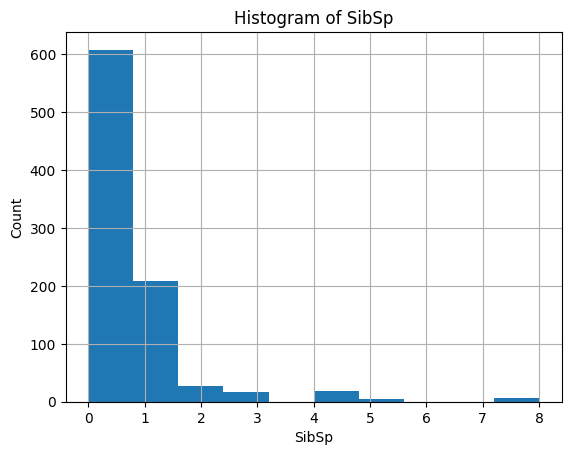

In [31]:
df['SibSp'].hist(bins=10)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Histogram of SibSp')
plt.show()

<Axes: xlabel='SibSp'>

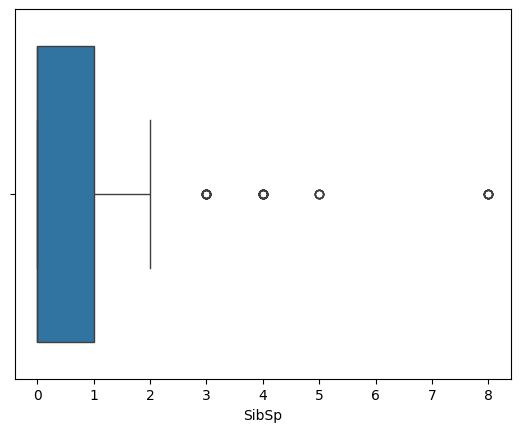

In [32]:
sns.boxplot(x=df['SibSp'])

## Parch

In [33]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [34]:
df['Parch'].median()

np.float64(0.0)

In [35]:
df['Parch'].mode()

0    0
Name: Parch, dtype: int64

In [36]:
df['Parch'].value_counts() / len(df) * 100

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64

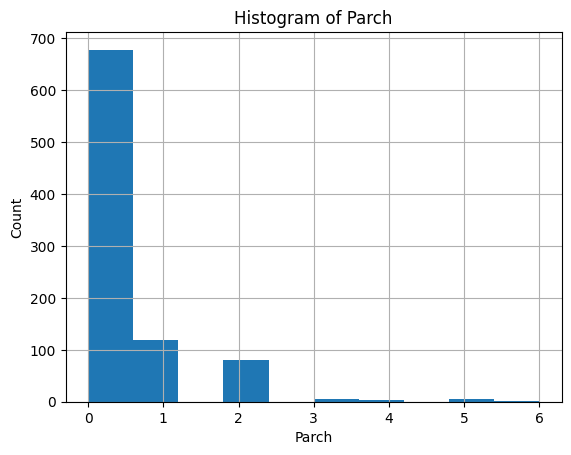

In [37]:
df['Parch'].hist(bins=10)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Histogram of Parch')
plt.show()

<Axes: xlabel='Parch'>

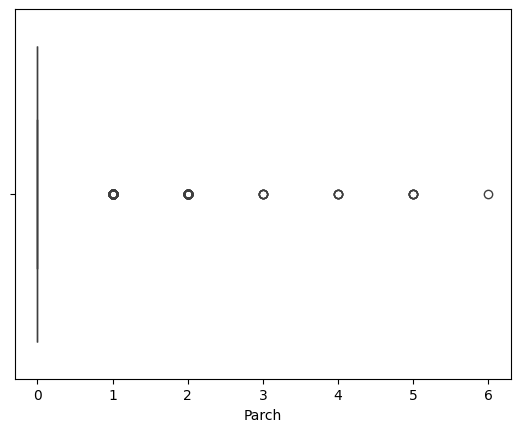

In [38]:
sns.boxplot(x=df['Parch'])

## Fare

In [39]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [40]:
df['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [41]:
df['Fare'].median()

np.float64(14.4542)

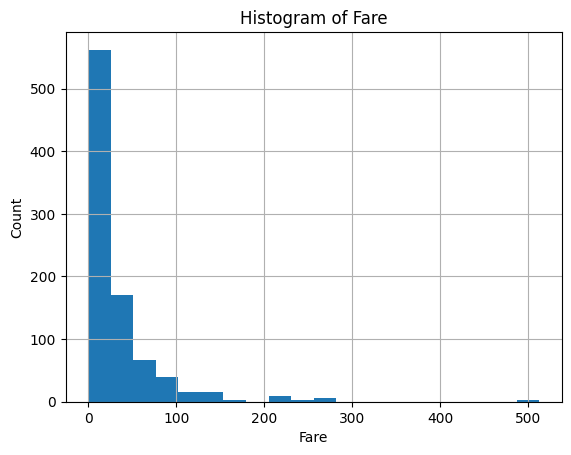

In [42]:
df['Fare'].hist(bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()

<Axes: xlabel='Fare'>

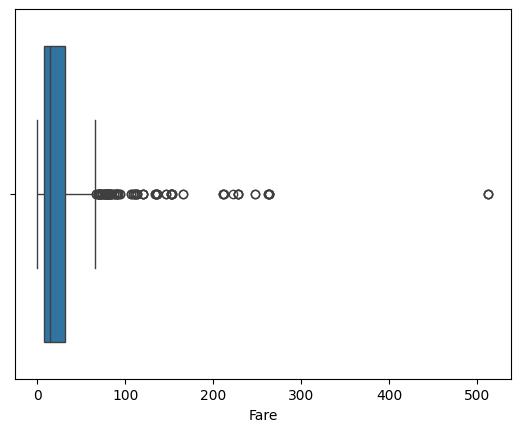

In [43]:
sns.boxplot(x=df['Fare'])

## Embarked

In [44]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [45]:
df['Embarked'].value_counts() / len(df) * 100

Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64

Text(0.5, 1.0, 'Bar plot of Embarked')

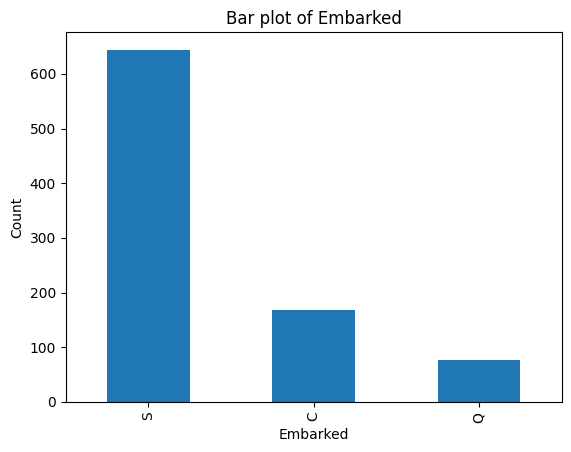

In [46]:
df['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Bar plot of Embarked')

# Multivariate Analysis

## Survived Vs Pclass

In [47]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [48]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [49]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Survived Vs Sex

In [50]:
pd.crosstab(df['Sex'], df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [51]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [52]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Survived Vs Age

In [53]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age by Survival')

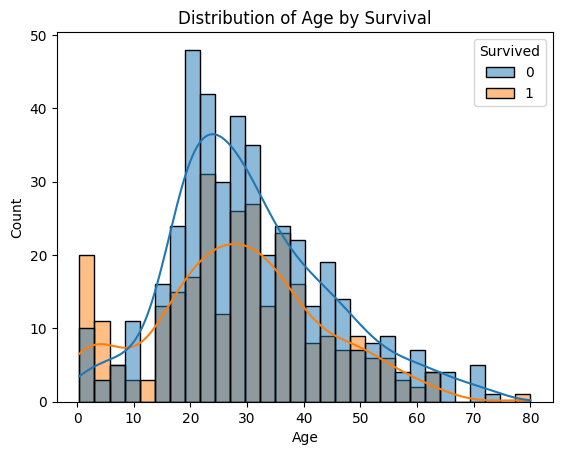

In [54]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Age by Survival')

Text(0.5, 1.0, 'Age vs Survival')

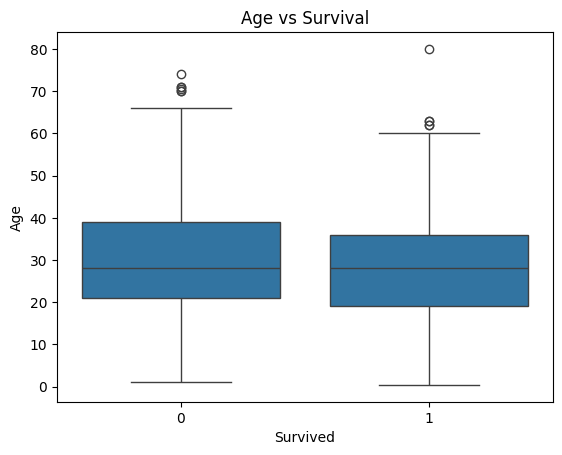

In [55]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')


## Survived Vs SibSp

In [56]:
pd.crosstab(df['SibSp'], df['Survived'], margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [57]:
pd.crosstab(df['SibSp'], df['Survived'], normalize='index') * 100

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


In [58]:
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by SibSp')

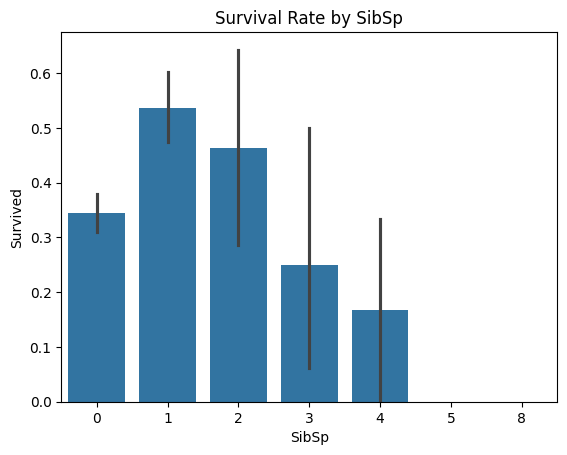

In [59]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')


## Survived Vs Parch

In [60]:
pd.crosstab(df['Parch'], df['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [61]:
pd.crosstab(df['Parch'], df['Survived'], normalize='index') * 100

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


In [62]:
df.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by SibSp')

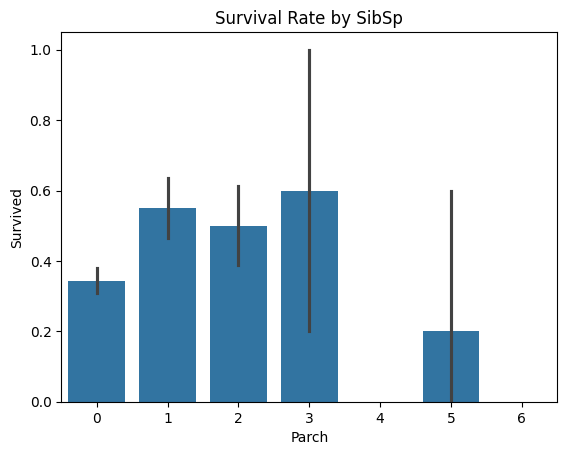

In [63]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by SibSp')

## Survived Vs Fare

In [64]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Distribution of Fare by Survival')

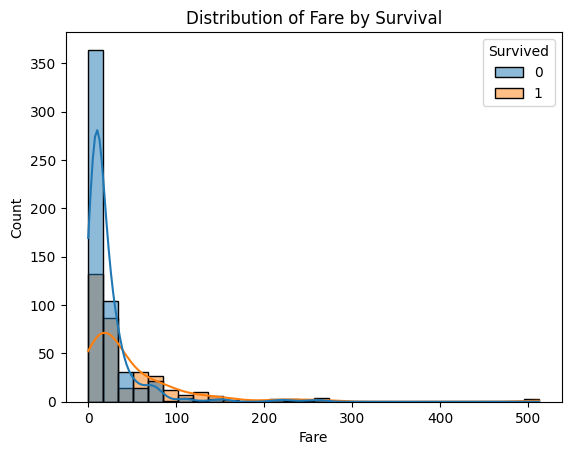

In [65]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Fare by Survival')

Text(0.5, 1.0, 'Fare vs Survival')

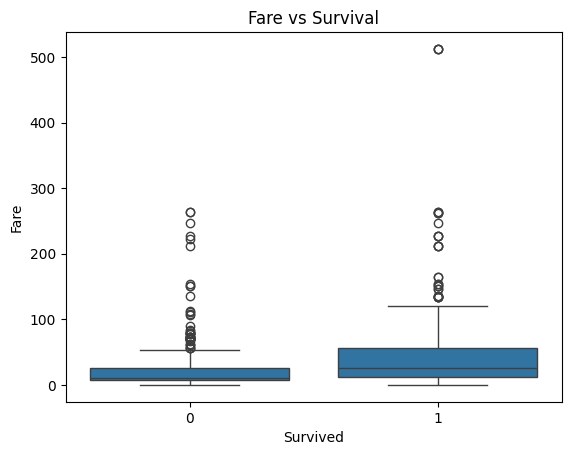

In [66]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')

## Survived Vs Embarked

In [67]:
pd.crosstab(df['Embarked'], df['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [68]:
pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [69]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

## Correlation Matrix Heatmap

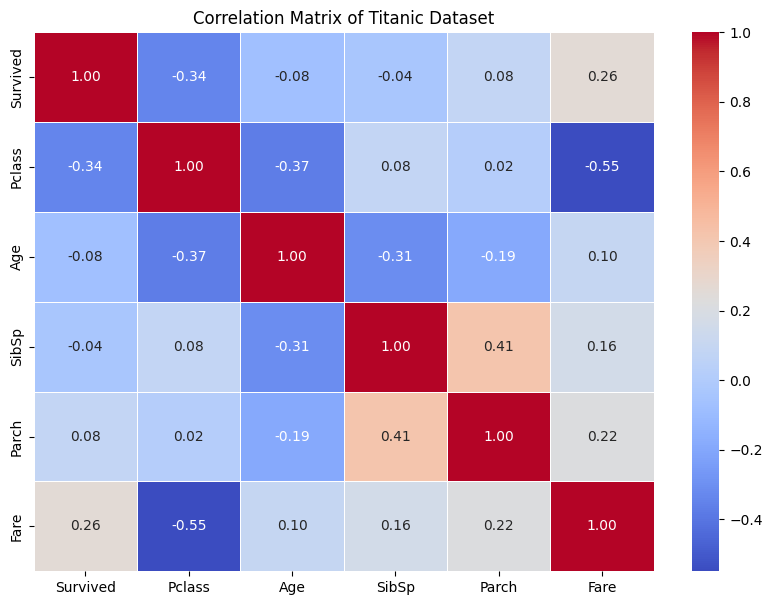

In [70]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId'])

corr = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()

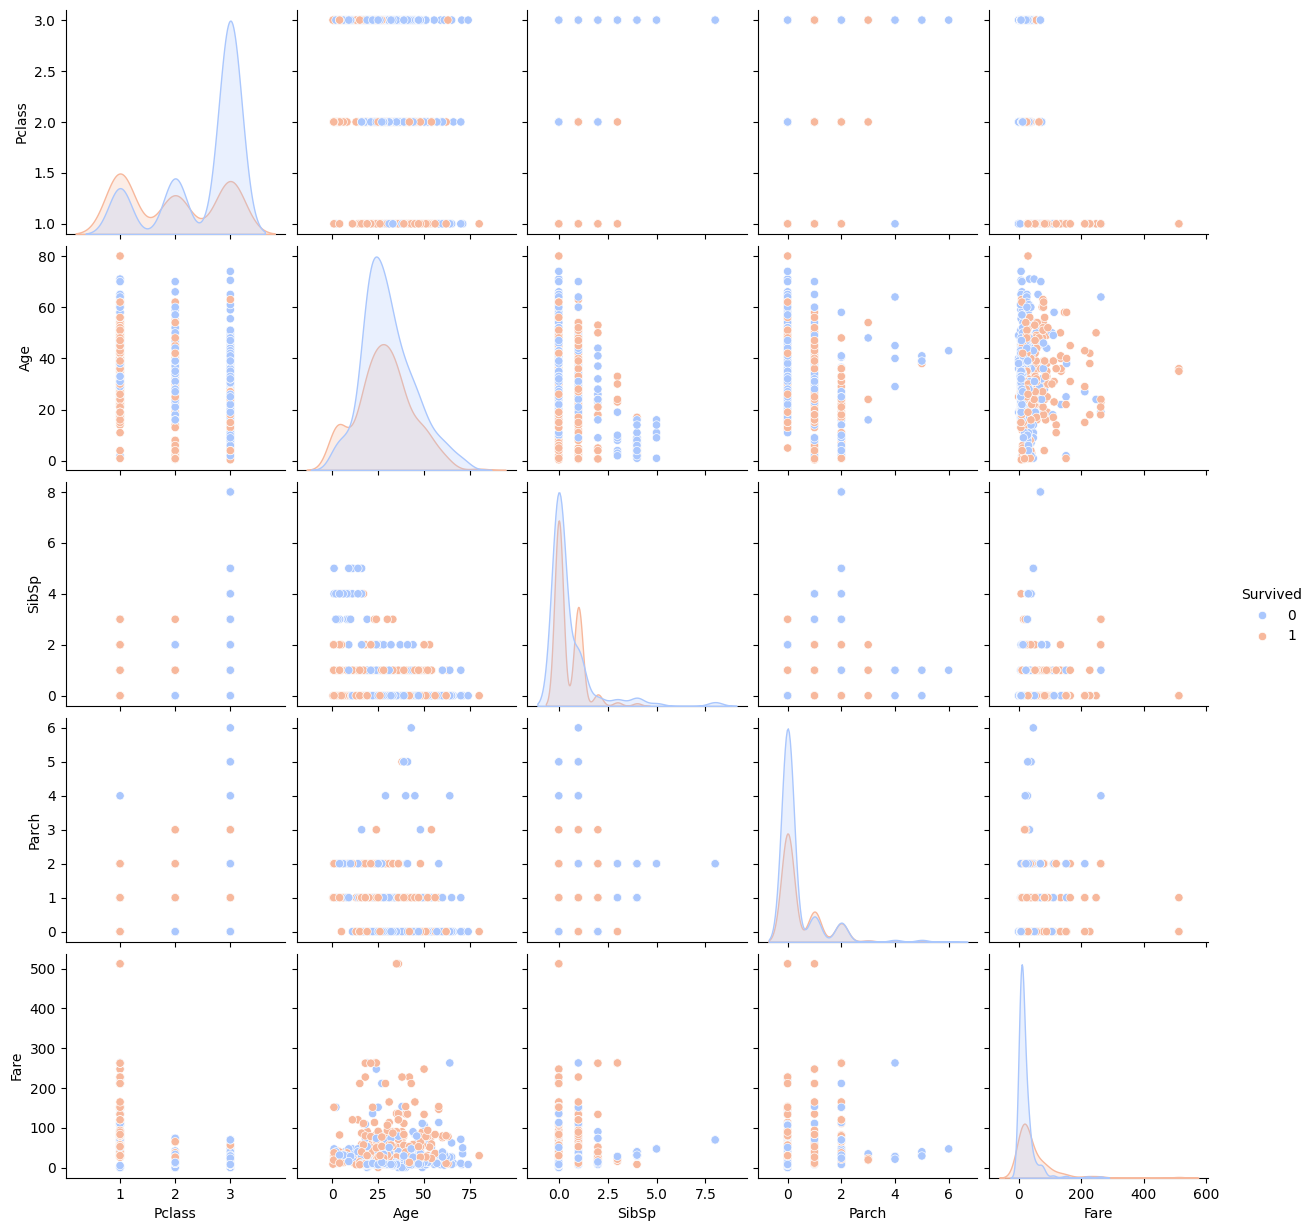

In [71]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

sns.pairplot(df[cols], diag_kind='kde', hue='Survived', palette='coolwarm')
plt.show()